In [209]:
using DelimitedFiles, Printf

## Day 1: The Tyranny of the Recket Equation

In [210]:
data1 = readdlm("day1.txt")

fuelrequired(mass) = floor(Int, mass / 3) - 2
sum(fuelrequired.(data1))

3406342

### Part Two

In [211]:
function fueloffuel(fuel)
    ff = fuelrequired(fuel)
    if ff <= 0
        return fuel
    end
    fuel + fueloffuel(ff)
end

fuels = fuelrequired.(data1)
sum(fueloffuel.(fuels))

5106629

## Day 2: 1202 Program Alarm

In [212]:
data2 = readdlm("day2.txt", ',', Int) |> vec
data2[2] = 12
data2[3] = 2;

In [267]:
function compute(prog, inputs=[], debug=false)
    idx(m) = prog[m] + 1
    
    function get(p, mode, x)
        if mode == 0
            return p[idx(x)]
        elseif mode == 1
            return p[x]
        end
    end
    
    function parseopcode(code)
        codes = digits(code) |> reverse
        for i in length(codes)+1:5
            pushfirst!(codes, 0)
        end
        op = 10 * codes[end-1] + codes[end]
        m3, m2, m1 = codes[1], codes[2], codes[3]
        (op, m1, m2, m3)
    end
        
    prog = copy(prog)
    pc = 1
    opcode, m1, m2, m3 = parseopcode(prog[pc])
    while opcode != 99
        if opcode == 1
            prog[idx(pc + 3)] = get(prog, m1, pc + 1) + get(prog, m2, pc + 2)
            if debug
                @printf("opcode 1: , %0.0f = %0.0f\n", idx(pc + 3), prog[idx(pc + 3)])
            end
            pc += 4
        elseif opcode == 2
            prog[idx(pc + 3)] = get(prog, m1, pc + 1) * get(prog, m2, pc + 2)
            if debug
                @printf("opcode 2: , %0.0f = %0.0f\n", pc + 3, prog[idx(pc + 3)])
            end
            pc += 4
        elseif opcode == 3
            prog[idx(pc + 1)] = popfirst!(inputs)
            if debug
                @printf("opcode 3: , store %0.0f in %0.0f\n", prog[idx(pc + 1)], idx(pc + 1))
            end
            pc += 2
        elseif opcode == 4
            println(get(prog, m1, pc + 1))
            if debug
                @printf("opcode 4: , print %0.0f\n", get(prog, m1, pc + 1))
            end
            pc += 2
        elseif opcode == 5
            if get(prog, m1, pc + 1) != 0
                pc = get(prog, m2, pc + 2)
            else
                pc += 3
            end
        elseif opcode == 6
            if get(prog, m1, pc + 1) == 0
                pc = get(prog, m2, pc + 2)
            else
                pc += 3
            end
        elseif opcode == 7
            prog[idx(pc + 3)] = 0
            if get(prog, m1, pc + 1) < get(prog, m2, pc + 2)
                prog[idx(pc + 3)] = 1
            end
            pc += 4
        elseif opcode == 8
            prog[idx(pc + 3)] = 0
            if get(prog, m1, pc + 1) == get(prog, m2, pc + 2)
                prog[idx(pc + 3)] = 1
            end
            if debug
                @printf("opcode 8: ,%0.0f == %0.0f, store %0.0f in %0.0f\n", 
                        get(prog, m1, pc + 1), 
                        get(prog, m2, pc + 2),
                        prog[idx(pc + 3)], 
                        idx(pc + 3)
                       )
            end
            pc += 4
        end
        opcode, m1, m2, m3 = parseopcode(prog[pc])
    end
    prog
end
            
compute(data2)[1]

5305097

### Part Two

In [237]:
function nounverb(prog)
    for noun in 0:99
        for verb in 0:99
            prog2 = copy(prog)
            prog2[2] = noun
            prog2[3] = verb
            if compute(prog2)[1] == 19690720
                return 100 * noun + verb
            end
        end
    end
end

nounverb(data2)

4925

## Day 3: Crossed Wires

In [238]:
data3 = readdlm("day3.txt", ',');

In [239]:
function pathpts(path)
    pts = []
    loc = (0, 0)
    for d in path
        dir = d[1]
        totaldist = parse(Int, d[2:end])
        for _ in 1:totaldist
            if dir == 'U'
                loc = (loc[1], loc[2] + 1)
            elseif dir == 'D'
                loc = (loc[1], loc[2] - 1)
            elseif dir == 'R'
                loc = (loc[1] + 1, loc[2])
            else 
                loc = (loc[1] - 1, loc[2])
            end
            push!(pts, loc)
        end
    end
    pts
end

Base.abs(t::Tuple{Int64,Int64}) = (abs(t[1]), abs(t[2]))

function wirecross(data)
    wire1 = pathpts(data3[1,:])
    wire2 = pathpts(data3[2,:])
    crosses = intersect(wire1, wire2)
    minimum((sum ∘ abs).(crosses))
end

wirecross(data3)

386

### Part Two

In [146]:
function numsteps(wire, pt)
    d = 1
    for p in wire
        if p == pt
            return d
        end
        d += 1
    end
end

function signaldelay(data)
    wire1 = pathpts(data3[1,:])
    wire2 = pathpts(data3[2,:])
    crosses = intersect(wire1, wire2)
    d1s = map(x -> numsteps(wire1, x), crosses)
    d2s = map(x -> numsteps(wire2, x), crosses)
    minimum(d1s + d2s)
end
    
signaldelay(data3)

6484

## Day 4: Secure Container

In [155]:
function valid(pwd)
    ds = digits(pwd) |> reverse
    fact1 = length(Set(ds)) != length(ds)
    fact2 = sort(ds) == ds
    fact1 && fact2
end

function vcount(pwd1, pwd2)
    pwds = collect(pwd1:pwd2)
    sum(valid.(pwds))
end
        
vcount(172930, 683082)

1675

In [169]:
function valid2(pwd)
    ds = digits(pwd) |> reverse
    fact2 = sort(ds) == ds
    push!(ds, -1)
    pushfirst!(ds, -1)
    fact1 = false
    for i = 2:length(ds)-2
        v = @view ds[i-1:i+2]
        if v[1] != v[2] && v[2] == v[3] && v[3] != v[4]
            fact1 = true
            break;
        end
    end
    fact1 && fact2
end

function vcount2(pwd1, pwd2)
    pwds = collect(pwd1:pwd2)
    sum(valid2.(pwds))
end

vcount2(172930, 683082)

1142

## Day 5: Sunny with a Chance of Asteroids

In [247]:
data5 = readdlm("day5.txt", ',', Int) |> vec;
compute(data5, [1]);

0
0
0
0
0
0
0
0
0
12440243


### Day Two

In [268]:
p1 = [3,9,8,9,10,9,4,9,99,-1,8]
c = compute(p1, [8], true);

opcode 3: , store 8 in 10
opcode 8: ,0 == 8, store 0 in 10
0
opcode 4: , print 0


In [264]:
c

11-element Array{Int64,1}:
  3
  9
  8
  9
 10
  9
  4
  9
 99
  0
  8

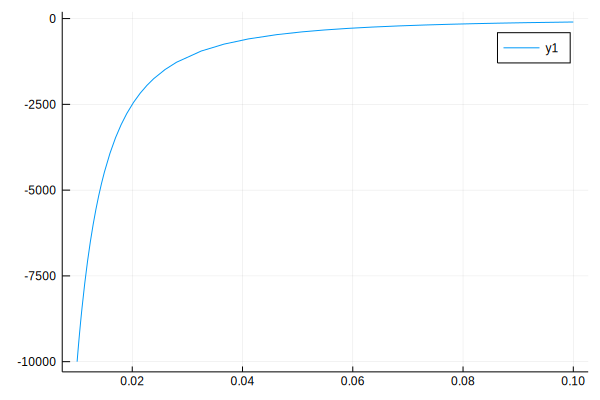

In [291]:
using Plots

plot((x ->  -1/x^2), 0.01, .1)